In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv("zomato.csv")

In [10]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
data.shape

(51717, 17)

In [12]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [13]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
df = data.drop(["url", "phone"], axis=1)

In [16]:
df.duplicated().sum()

43

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [22]:
df.dropna(how="any", inplace=True)
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [23]:
df.shape

(23395, 15)

In [24]:
df = df.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'} )

In [25]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [26]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [28]:
df["cost"] = df["cost"].apply(lambda x: x.replace(",", ""))
df["cost"] = df["cost"].astype("float")                              

In [29]:
df["cost"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [30]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
df = df[df["rate"] != "NEW"]

In [33]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [35]:
df["rate"] = df["rate"].apply(lambda x: x.replace("/5",""))

In [36]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

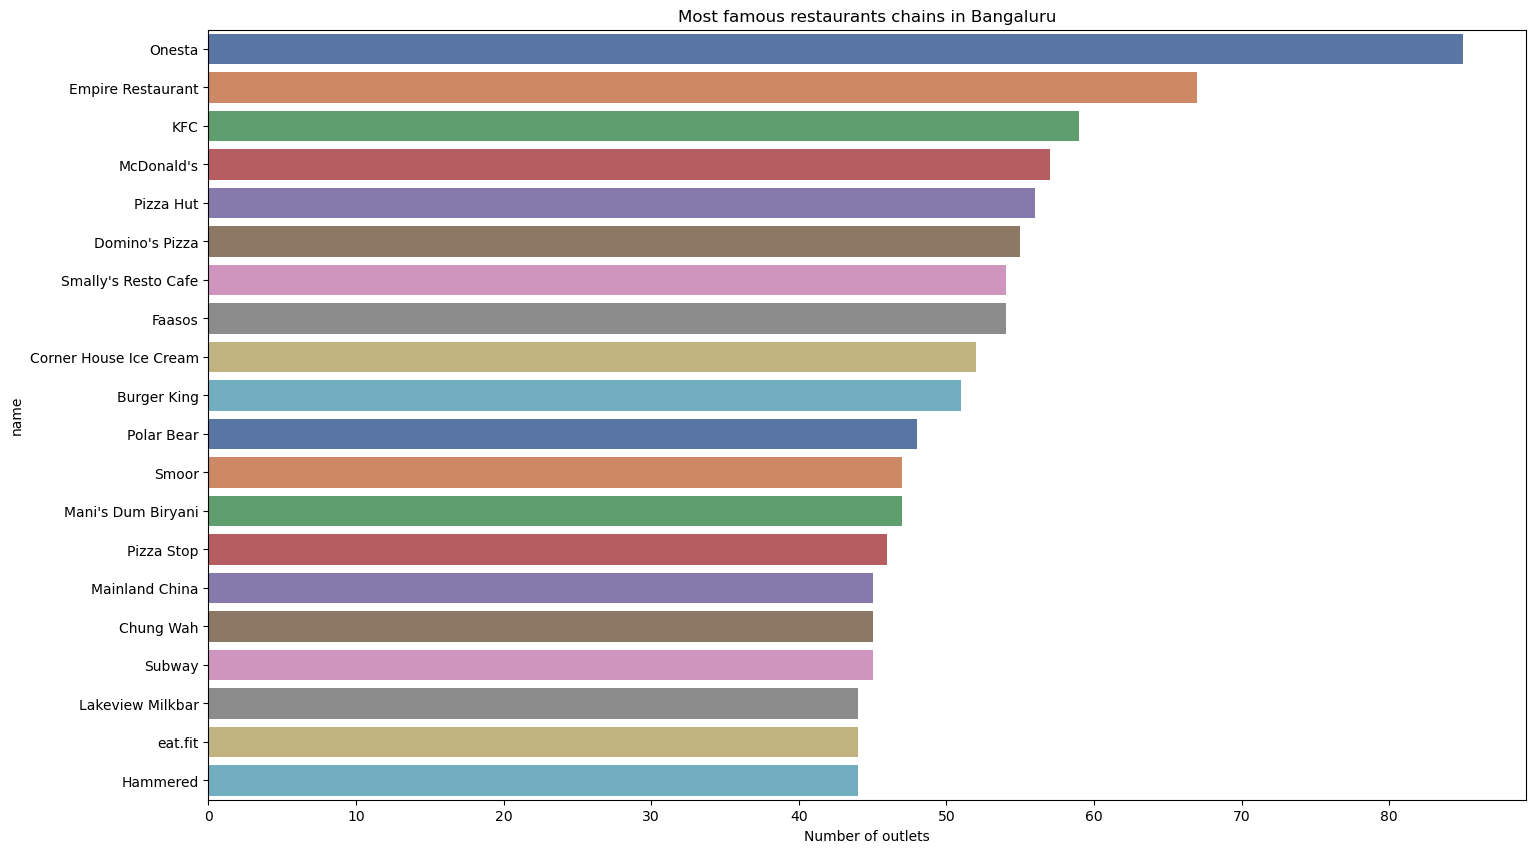

In [37]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

In [39]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

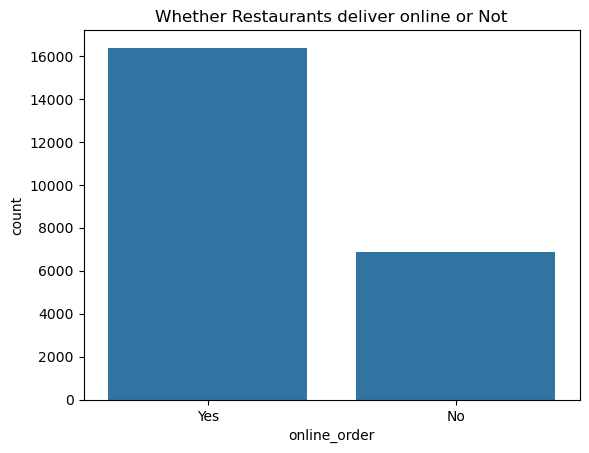

In [43]:
sns.countplot(x=df['online_order'])
fig.set_size_inches(5,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

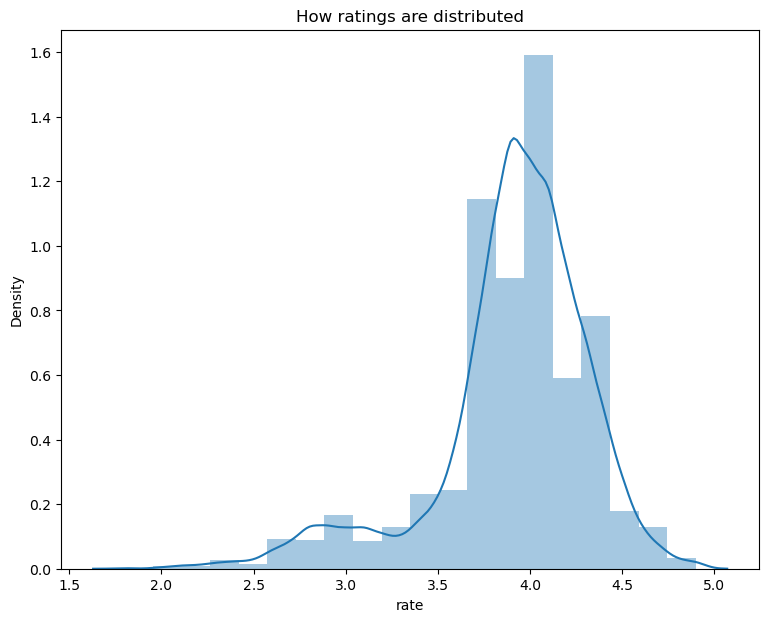

In [44]:
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)
plt.title("How ratings are distributed")
plt.show()

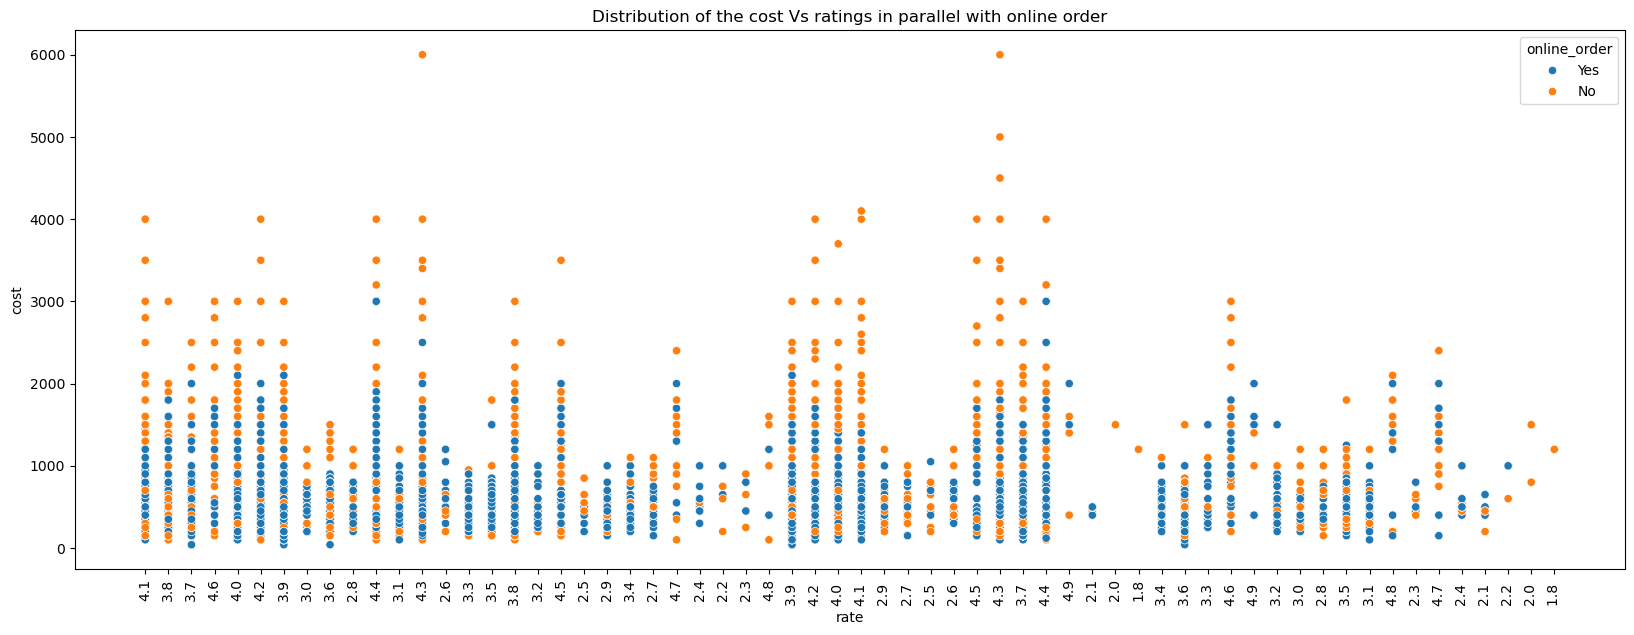

In [49]:
plt.figure(figsize=(20,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.title("Distribution of the cost Vs ratings in parallel with online order")
plt.xticks(rotation=90)
plt.show()

In [52]:
df["rate"] = df["rate"].astype("float")

In [60]:
print("Count of ratings as between '1 and 2'", df[(df["rate"] > 1) & (df["rate"] <= 2)].shape[0])
print("Count of ratings as between '2 and 3'", df[(df["rate"] > 2) & (df["rate"] <= 3)].shape[0])
print("Count of ratings as between '3 and 4'", df[(df["rate"] > 3) & (df["rate"] <= 4)].shape[0])
print("Count of ratings as between '4 and 5'", df[(df["rate"] > 4) & (df["rate"] <= 5)].shape[0])


Count of ratings as between '1 and 2' 16
Count of ratings as between '2 and 3' 1459
Count of ratings as between '3 and 4' 12764
Count of ratings as between '4 and 5' 9009


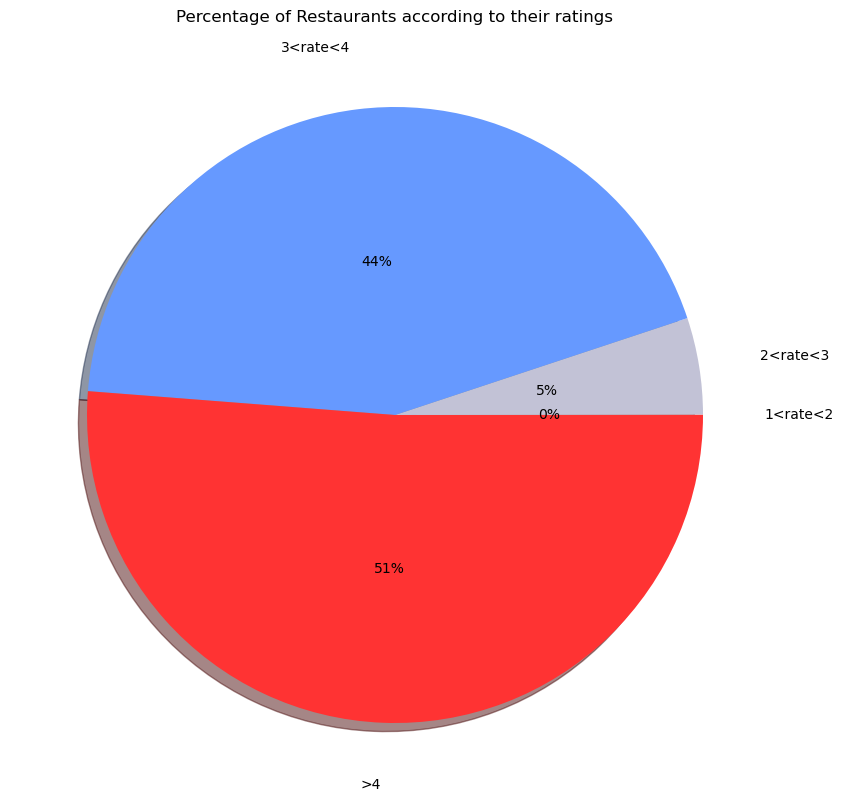

In [63]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=["1<rate<2", "2<rate<3", "3<rate<4",">4"]
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

Text(0.5, 1.0, 'Type of Service')

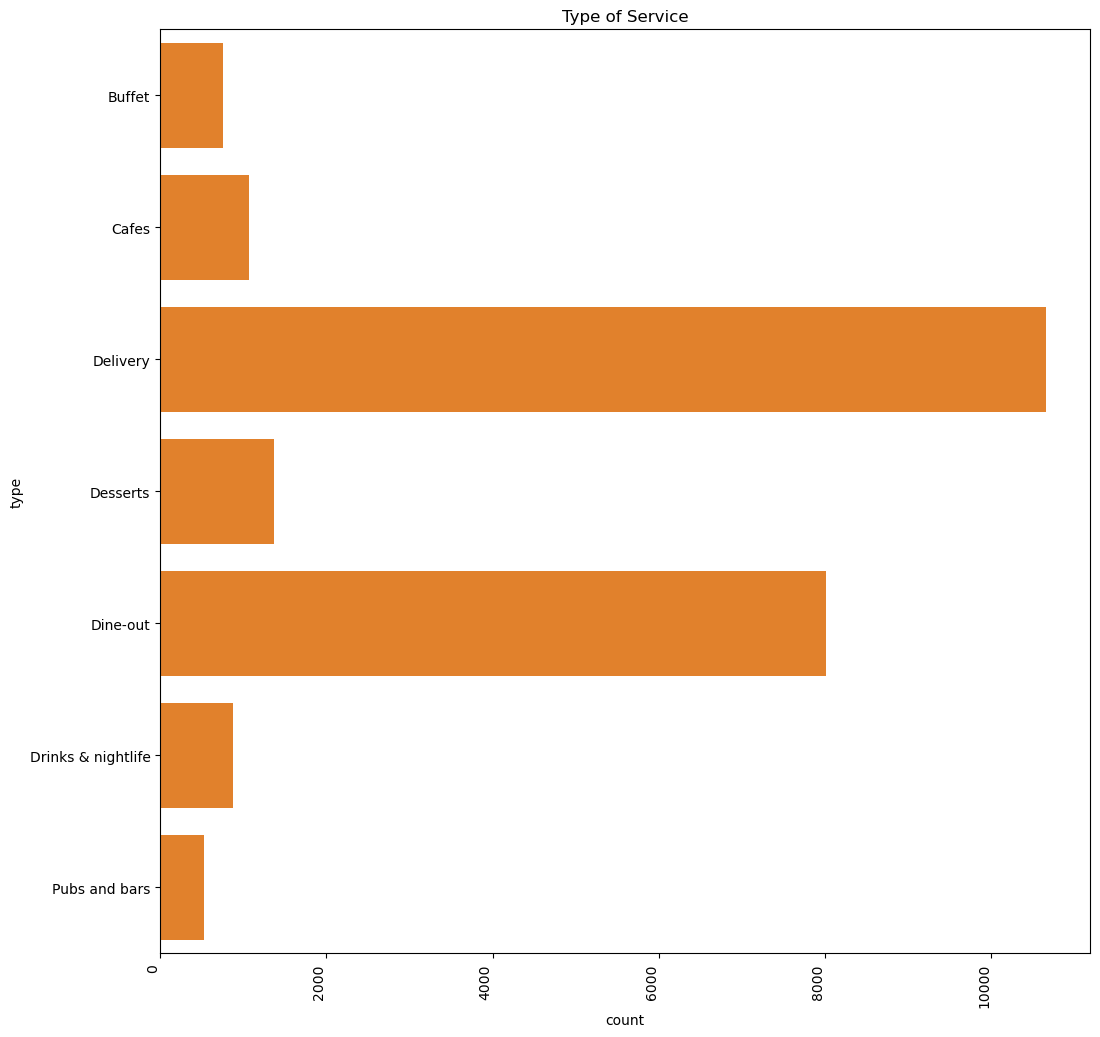

In [67]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

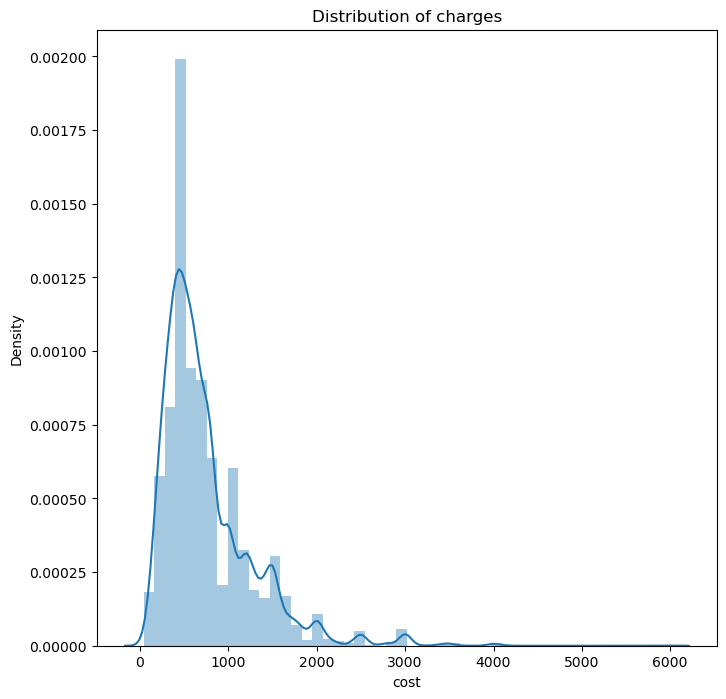

In [68]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.title("Distribution of charges")
plt.show()

In [69]:
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)


print("Count of Most liked dishes in Bangalore")
favouriteFood = pd.Series(likes).value_counts()
favouriteFood.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
Name: count, dtype: int64

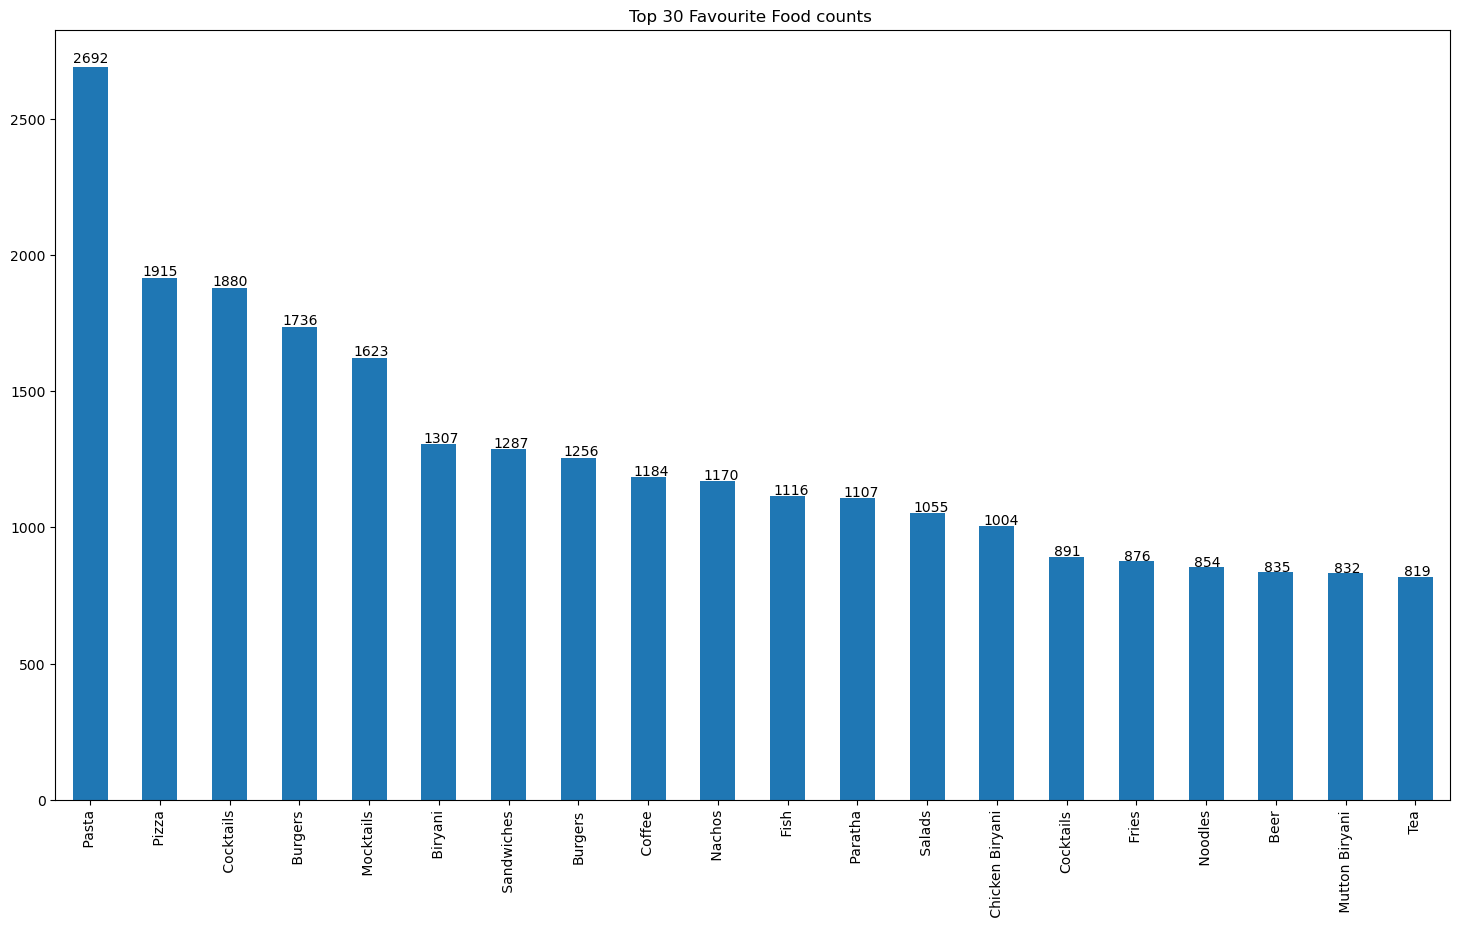

In [71]:
ax = favouriteFood.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

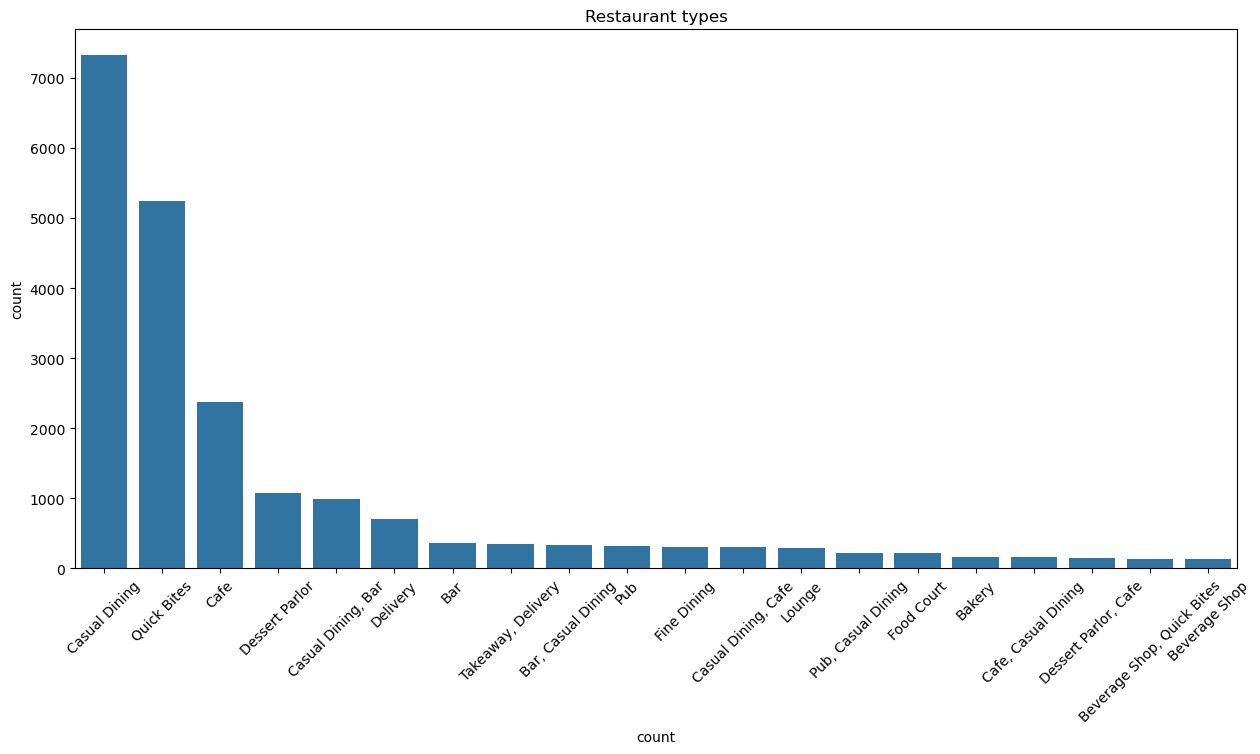

In [75]:
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(y=rest, x=rest.index)
plt.title("Restaurant types")
plt.xlabel("count")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Number of outlets')

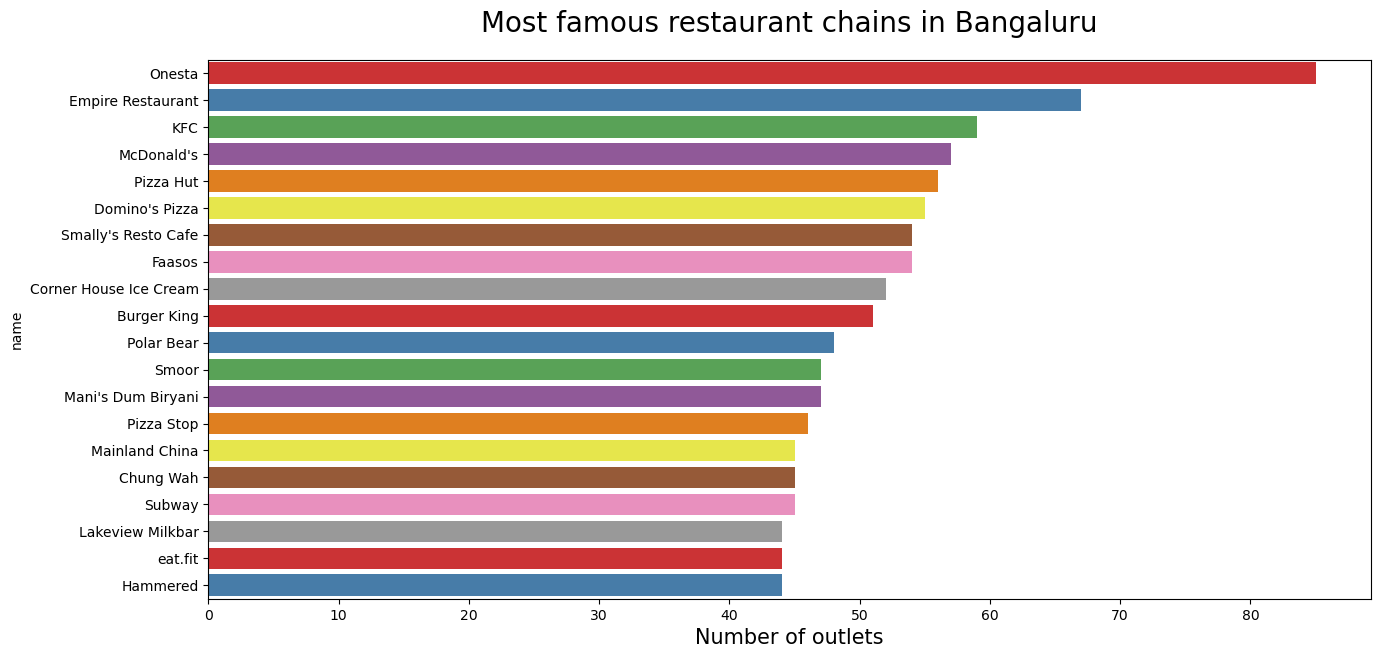

In [76]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [77]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [78]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [79]:
df["online_order"].value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [80]:
df.online_order = pd.to_numeric(df.online_order)

In [81]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.book_table = pd.to_numeric(df.book_table)

df.book_table.value_counts()

book_table
0    17191
1     6057
Name: count, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [83]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [84]:
myData=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
myData.to_csv('last_df.csv') 

In [86]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['rate']

In [88]:
scaler = MinMaxScaler()
columns = list(x.columns)
for col in columns:
    x[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(x[col])),columns=[col])

In [89]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1.0,1.0,0.046043,0.011494,0.277778,0.825000,0.127517,1.0
1,1.0,0.0,0.046756,0.011494,0.277778,0.353571,0.127517,1.0
2,1.0,0.0,0.054539,0.011494,0.222222,0.288095,0.127517,1.0
3,0.0,0.0,0.005228,0.011494,0.861111,0.944643,0.043624,1.0
4,0.0,0.0,0.009862,0.045977,0.277778,0.836905,0.093960,1.0


In [90]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=.3,random_state=10)

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("linear_regression", LinearRegression())
])

kFold = KFold(n_splits=10, shuffle=True, random_state=0)

param_grid = {
    "poly_features__degree": [1, 2, 3, 4],
    "linear_regression__fit_intercept": [True, False]
}


gridSearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModelLR = gridSearch.best_estimator_


scorePR = round(bestModelLR.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scorePR)

En iyi parametreler:  {'linear_regression__fit_intercept': False, 'poly_features__degree': 3}
En iyi negatif MSE:  -0.1244323653603526
R^2 Skoru:  32.28


In [93]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators" : [70, 100, 125],
    "max_depth" : [15, 25, 30, 35]
}

model=RandomForestRegressor()

gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)


print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModelRF = gridSearch.best_estimator_

scoreRF = round(bestModelRF.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scoreRF)


En iyi parametreler:  {'max_depth': 30, 'n_estimators': 100}
En iyi negatif MSE:  -0.02026857600984686
R^2 Skoru:  90.61


In [94]:
from xgboost import XGBRegressor

params = {
    "n_estimators" : [5, 15, 45, 70, 100],
    "learning_rate" : [0.01, 0.05, 0.1, 0.5, 1],
    "max_depth" : [1, 3, 5, 7, 10, 15, 25]
}

model=XGBRegressor()

gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModelXG = gridSearch.best_estimator_

scoreXG = round(bestModelXG.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scoreXG)

En iyi parametreler:  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
En iyi negatif MSE:  -0.01788983217933384
R^2 Skoru:  91.07


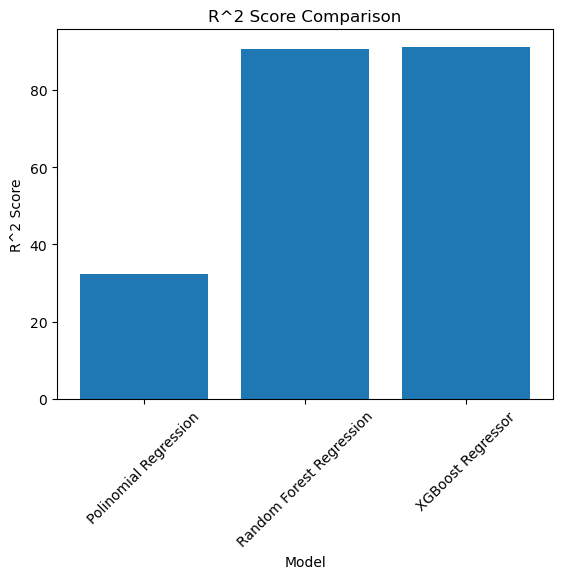

In [95]:
R2Scores = np.array([scorePR, scoreRF, scoreXG])

plt.bar(["Polinomial Regression",  "Random Forest Regression", "XGBoost Regressor"], R2Scores)
plt.title("R^2 Score Comparison")
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.show()

In [96]:
import pickle 
pickle.dump(bestModelXG, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))